In [1]:
# make plots prettier
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
import scanpy as sc
import scvi
import numpy as np
import pandas as pd
import seaborn as sns
import os

/home/zia/.local/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/zia/.local/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [ ]:
hagg = sc.read_10x_h5('h136.h5')
hagg

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
hagg.var_names_make_unique()
hagg

In [ ]:
sc.pl.highest_expr_genes(hagg, n_top=20, )

In [1]:
sc.pp.filter_cells(hagg, min_genes=200)
sc.pp.filter_genes(hagg, min_cells=3)
hagg

NameError: name 'sc' is not defined

In [10]:
hagg.var['mt'] = hagg.var_names.str.startswith('Mt-')
sc.pp.calculate_qc_metrics(hagg, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

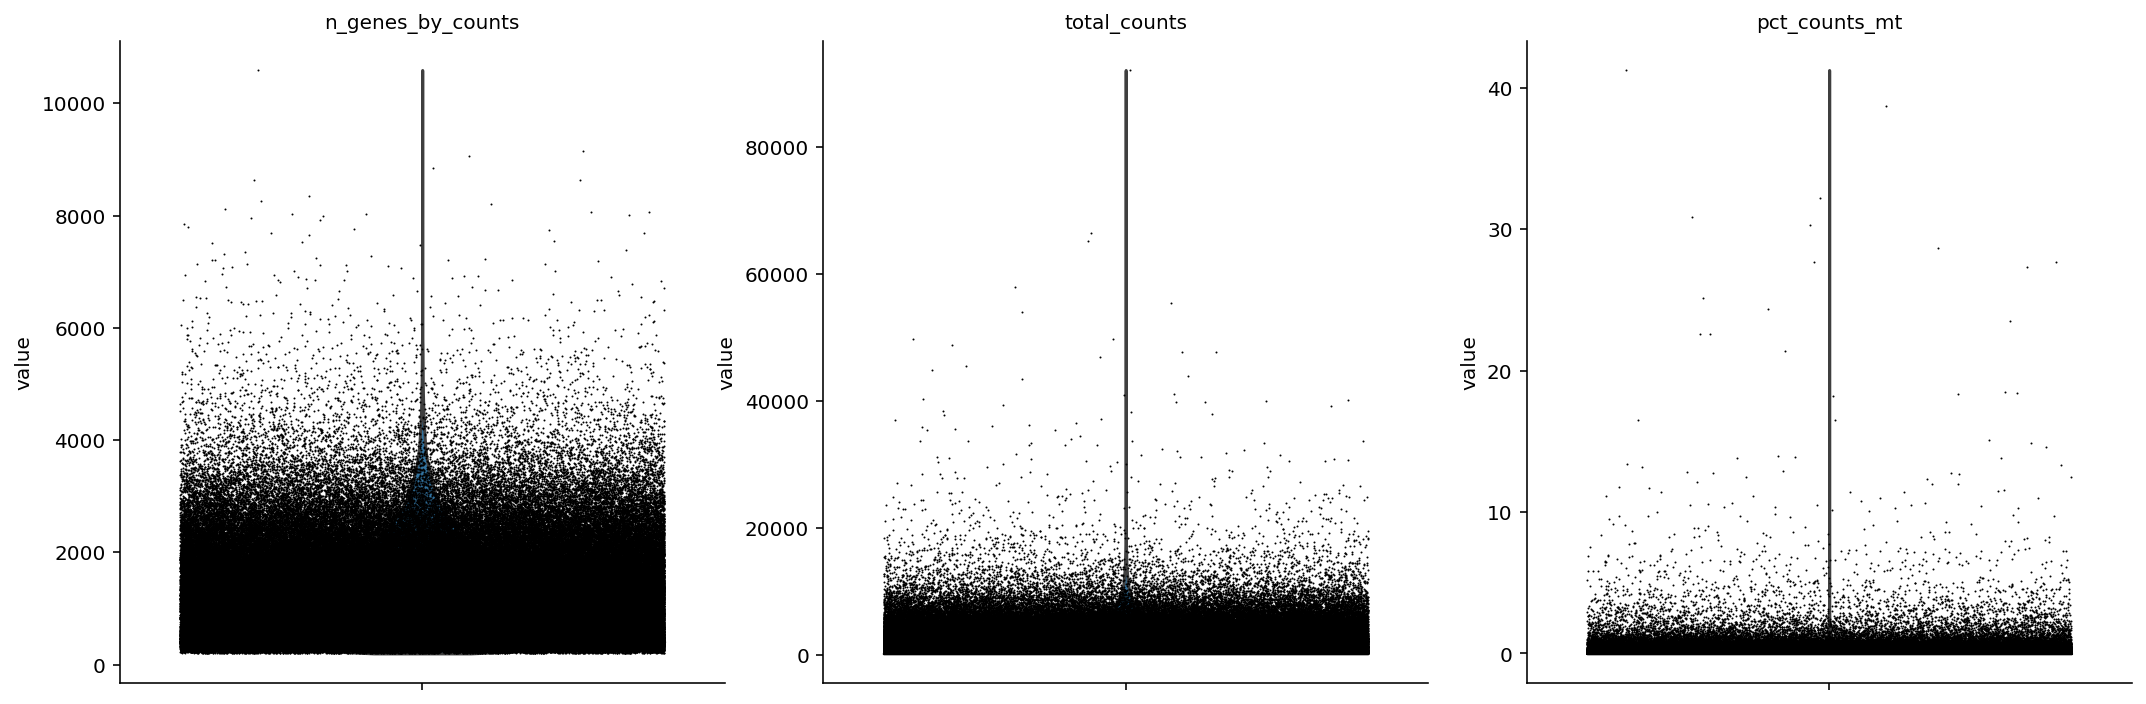

In [11]:
sc.pl.violin(hagg, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

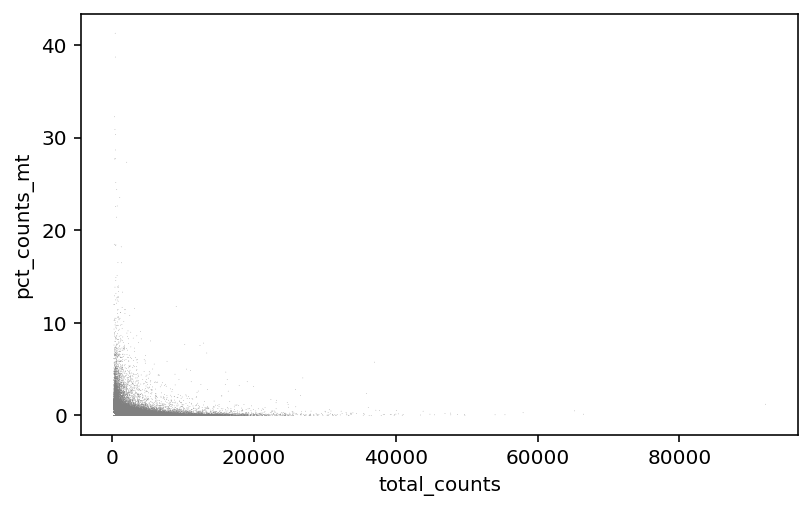

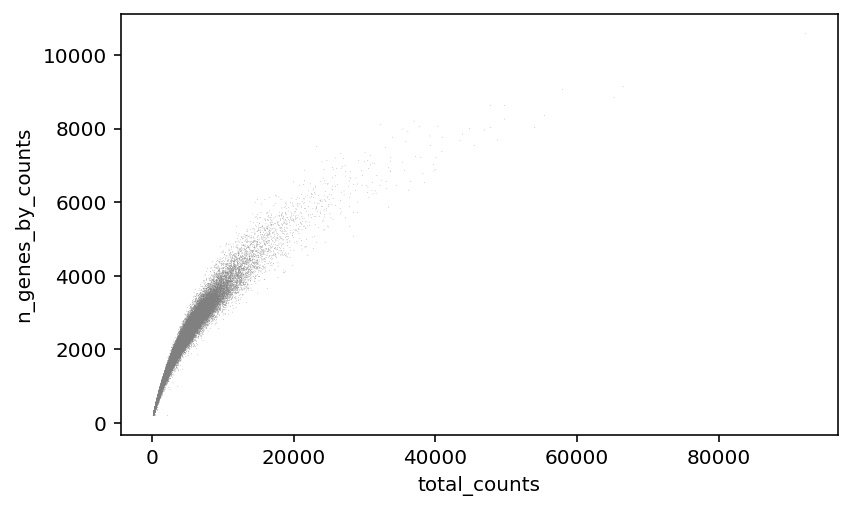

In [12]:
sc.pl.scatter(hagg, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(hagg, x='total_counts', y='n_genes_by_counts')

In [14]:
hagg = hagg[hagg.obs.n_genes_by_counts < 8000, :]
hagg = hagg[hagg.obs.pct_counts_mt < 10, :]

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [19]:
hagg

View of AnnData object with n_obs × n_vars = 273755 × 22757
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
sc.pp.normalize_total(hagg, target_sum=1e4)

/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
sc.pp.log1p(hagg)

In [22]:
sc.pp.highly_variable_genes(hagg, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


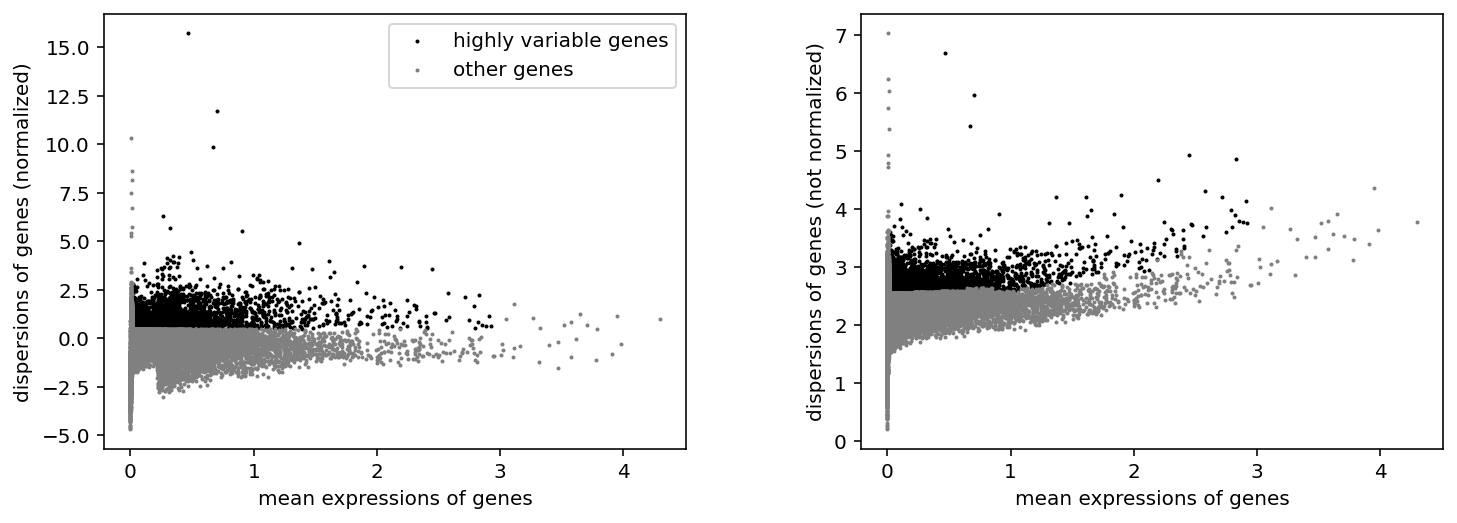

In [26]:
sc.pl.highly_variable_genes(hagg)

In [3]:
hagg.raw = hagg

NameError: name 'hagg' is not defined

In [6]:
hagg = hagg[:, hagg.var.highly_variable]

NameError: name 'hagg' is not defined

In [1]:
sc.pp.regress_out(hagg, ['total_counts', 'pct_counts_mt'])

NameError: name 'sc' is not defined

In [ ]:
sc.pp.scale(adata, max_value=10)